In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# plt.style.use('seaborn-colorblind') # deprecated since seaborn v3.6
sns.set_style('darkgrid')
%matplotlib inline
from data_exploration import explore

## Read the dataset

In [26]:
use_cols = [
    'Pclass', 'Sex', 'Age', 'Fare', 'SibSp',
    'Survived'
]

data = pd.read_csv('./data/titanic.csv', usecols=use_cols)

In [27]:
data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,male,22.0,1,7.2500
1,1,1,female,38.0,1,71.2833
2,1,3,female,26.0,0,7.9250


## Get dtypes for each columns

In [28]:
str_var_list, num_var_list, all_var_list = explore.get_dtypes(data=data)

In [29]:
print(str_var_list) # string type
print(num_var_list) # numeric type
print(all_var_list) # all

['Sex']
['Survived', 'Pclass', 'Age', 'SibSp', 'Fare']
['Sex', 'Survived', 'Pclass', 'Age', 'SibSp', 'Fare']


## General data description

In [6]:
explore.describe(data=data,output_path=r'./output/')

result saved at: ./output/describe.csv


,Survived,Pclass,Sex,Age,SibSp,Fare
count,891.000000,891.000000,891,714.000000,891.000000,891.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,male,NaN,NaN,NaN
freq,NaN,NaN,577,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,29.699118,0.523008,32.204208
std,0.486592,0.836071,NaN,14.526497,1.102743,49.693429
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000
25%,0.000000,2.000000,NaN,20.125000,0.000000,7.910400
50%,0.000000,3.000000,NaN,28.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,38.000000,1.000000,31.000000


## Discrete variable barplot
draw the barplot of a discrete variable x against y(target variable). 
By default the bar shows the mean value of y.

Image saved at ./output/Barplot_Pclass_Survived.png


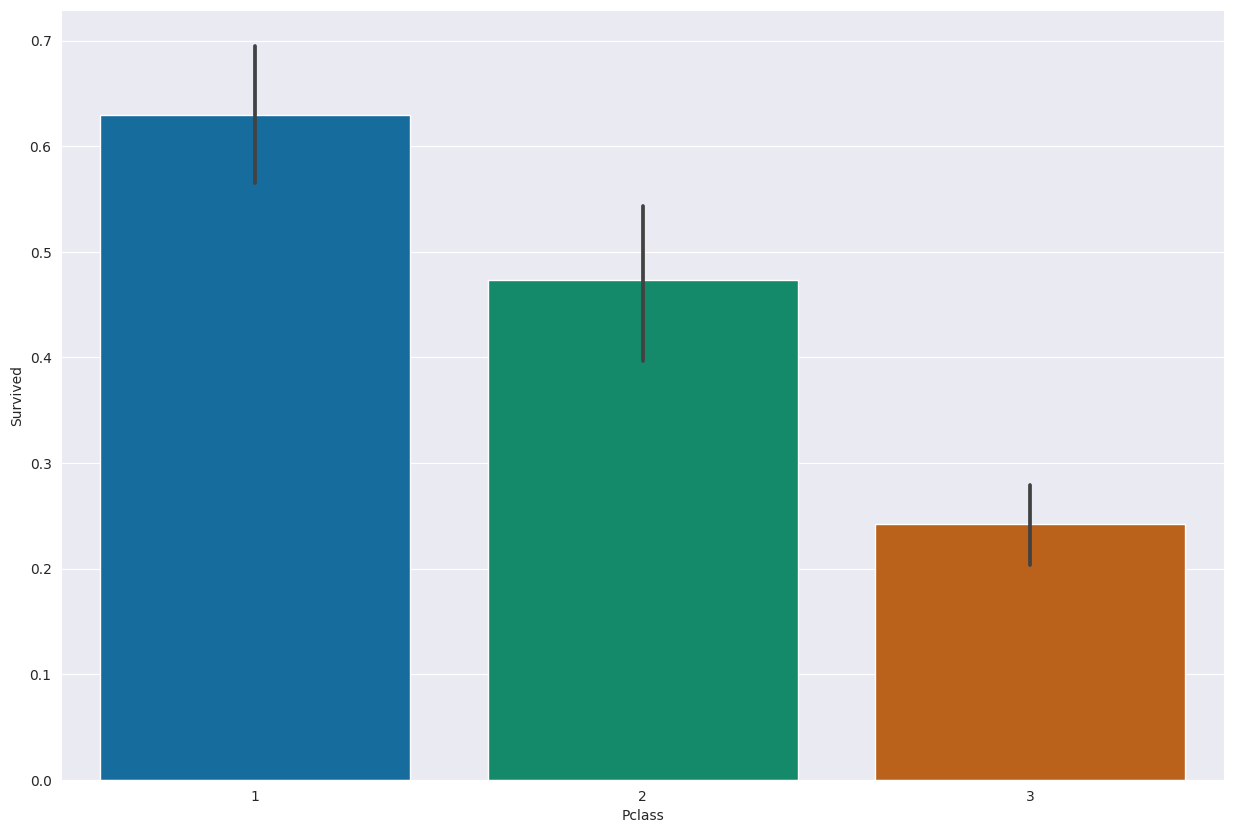

In [7]:
explore.discrete_var_barplot(x='Pclass',y='Survived',data=data,output_path='./output/')

## Discrete variable countplot
draw the countplot of a discrete variable x

Image saved at ./output/Countplot_Pclass.png


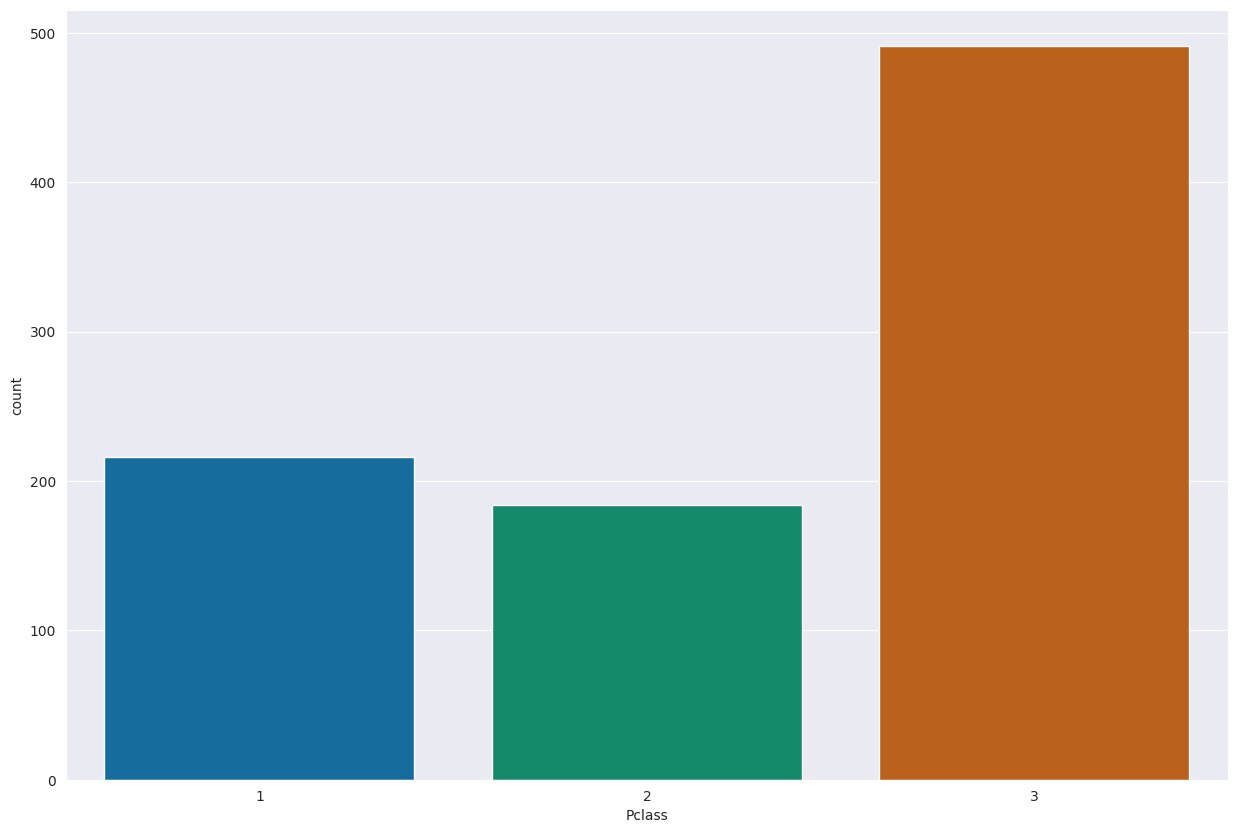

In [8]:
explore.discrete_var_countplot(x='Pclass',data=data,output_path='./output/')

## Discrete variable boxplot
draw the boxplot of a discrete variable x against y.

Image saved at ./output/Boxplot_Pclass_Fare.png


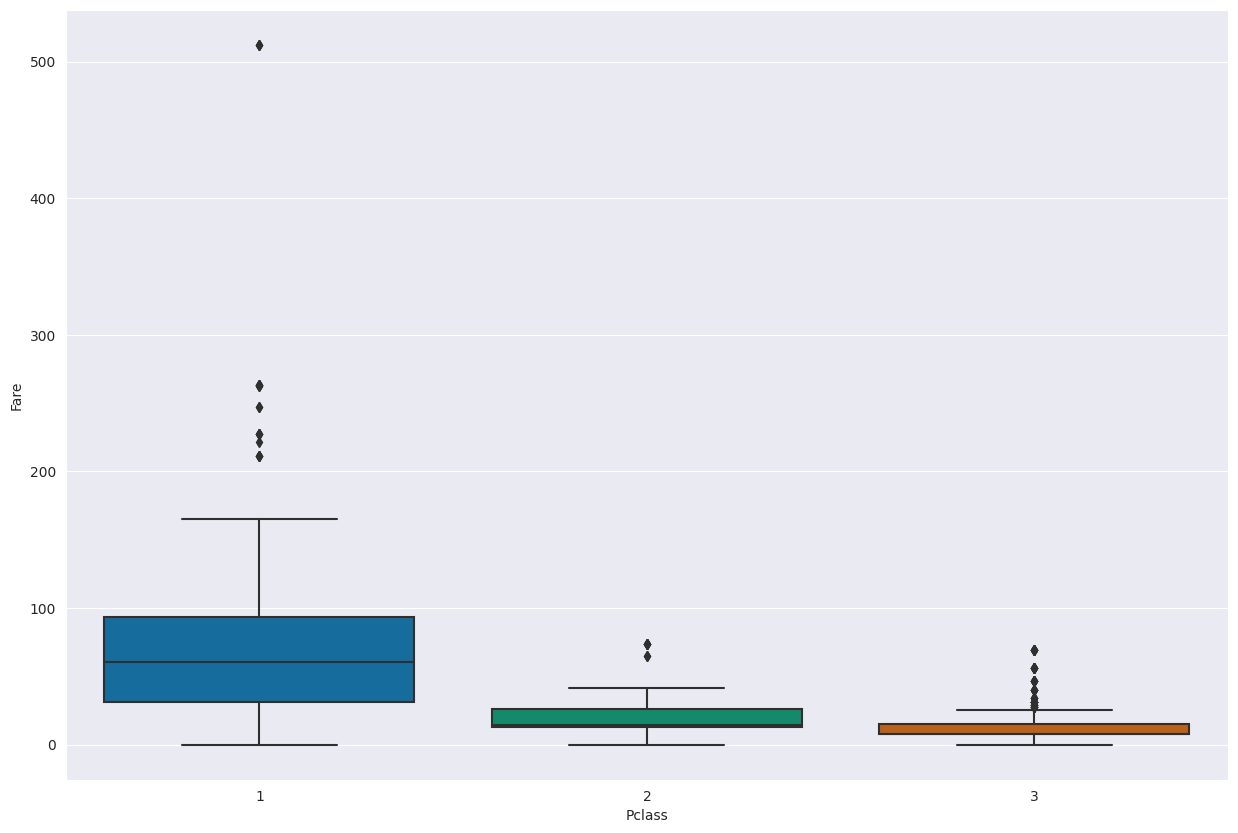

In [9]:
explore.discrete_var_boxplot(x='Pclass',y='Fare',data=data,output_path='./output/')

## Continuous variable distplot
draw the distplot of a continuous variable x.

/home/opc/workarea/current/Amazing-Feature-Engineering/data_exploration/explore.py:138: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=x,kde=False,bins=bins)


Image saved at ./output/Distplot_Fare.png


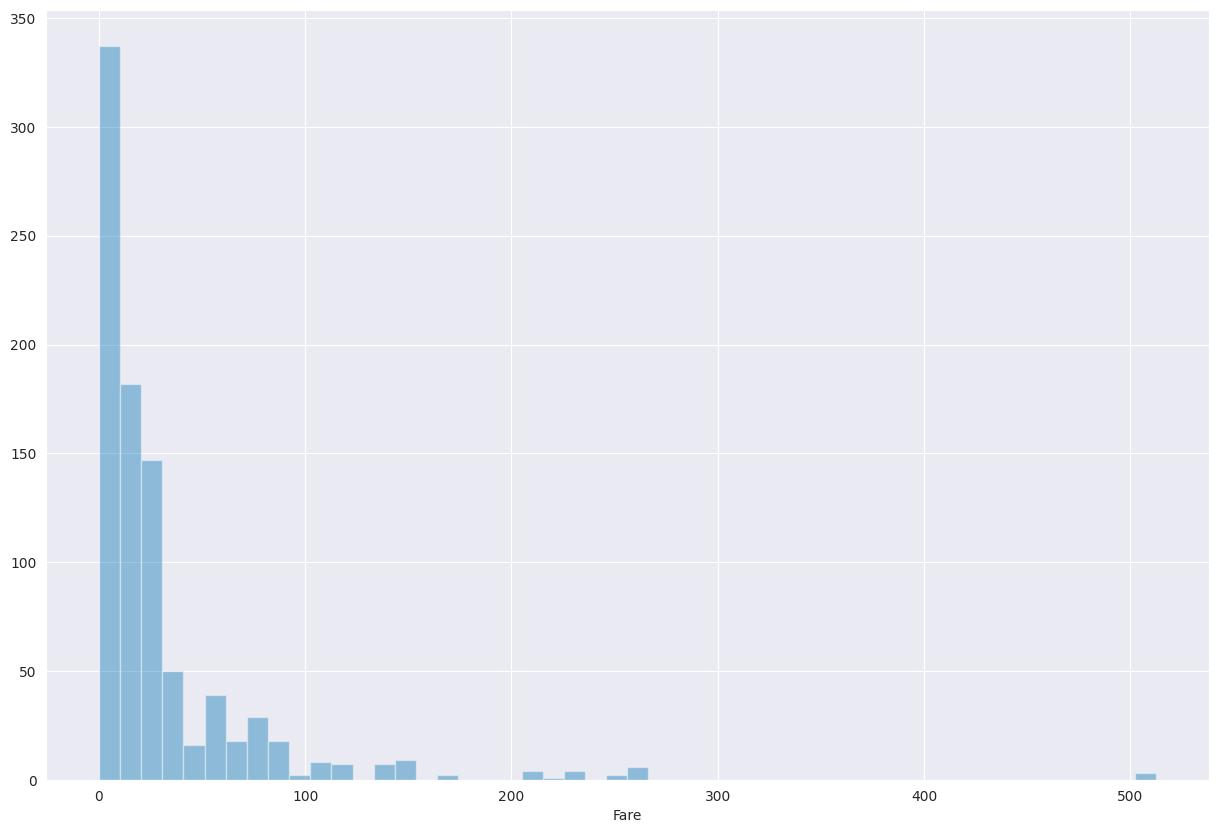

In [10]:
explore.continuous_var_distplot(x=data['Fare'],output_path='./output/')

## Scatter plot
draw the scatter-plot of two variables.

Image saved at ./output/Scatter_plot_Fare_Pclass.png


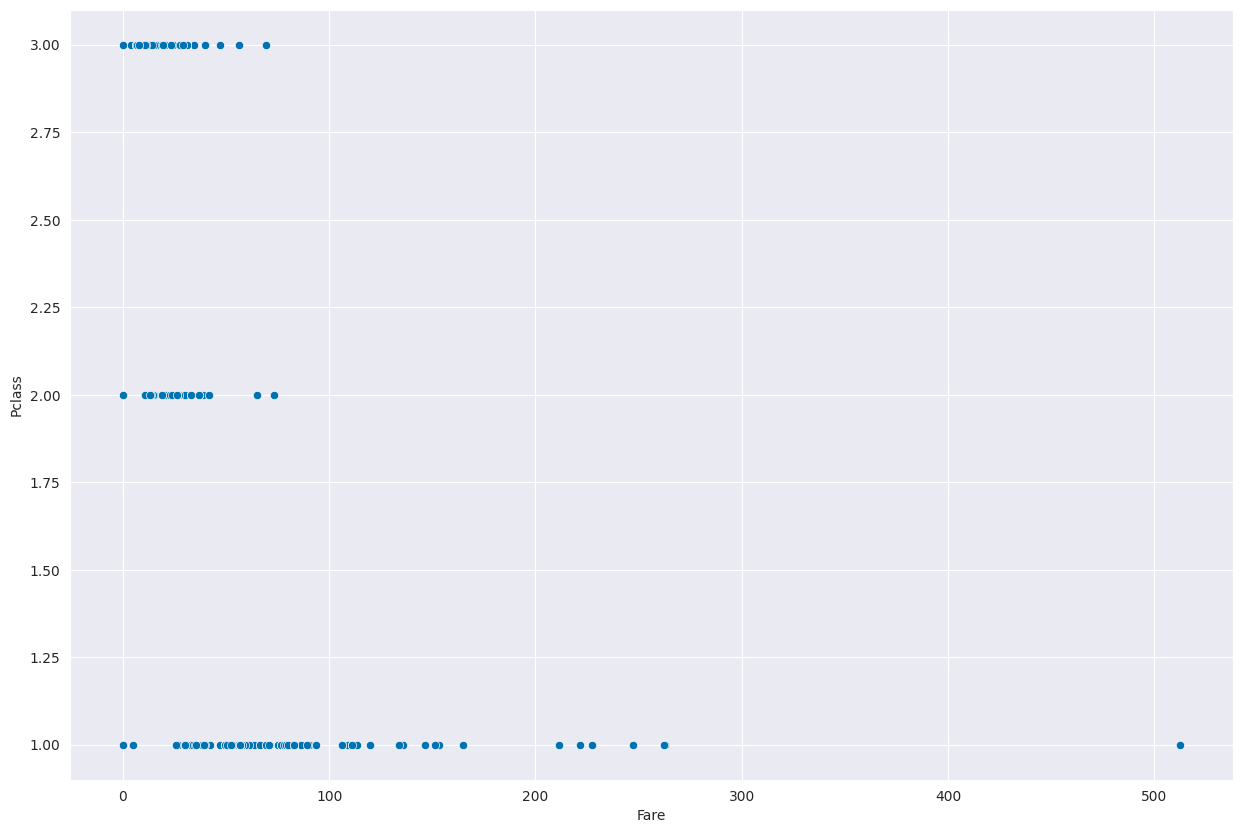

In [11]:
explore.scatter_plot(x=data.Fare,y=data.Pclass,data=data,output_path='./output/')

## Correlation plot
draw the correlation plot between variables.

In [33]:
one_hot = pd.get_dummies(data.Sex, dtype=int)
one_hot

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [34]:
data.join(one_hot)

,Survived,Pclass,Sex,Age,SibSp,Fare,female,male
0,0,3,male,22.0,1,7.2500,0,1
1,1,1,female,38.0,1,71.2833,1,0
2,1,3,female,26.0,0,7.9250,1,0
3,1,1,female,35.0,1,53.1000,1,0
4,0,3,male,35.0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,0,1
887,1,1,female,19.0,0,30.0000,1,0
888,0,3,female,NaN,1,23.4500,1,0
889,1,1,male,26.0,0,30.0000,0,1


In [38]:
# Replace dataframe column values male and female with 0 and 1

data['Sex'].replace(['female','male'], [0,1], inplace=True)
data

,Survived,Pclass,Sex,Age,SibSp,Fare
0,0,3,1,22.0,1,7.2500
1,1,1,0,38.0,1,71.2833
2,1,3,0,26.0,0,7.9250
3,1,1,0,35.0,1,53.1000
4,0,3,1,35.0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,27.0,0,13.0000
887,1,1,0,19.0,0,30.0000
888,0,3,0,NaN,1,23.4500
889,1,1,1,26.0,0,30.0000


Image saved at ./output/Corr_plot.png


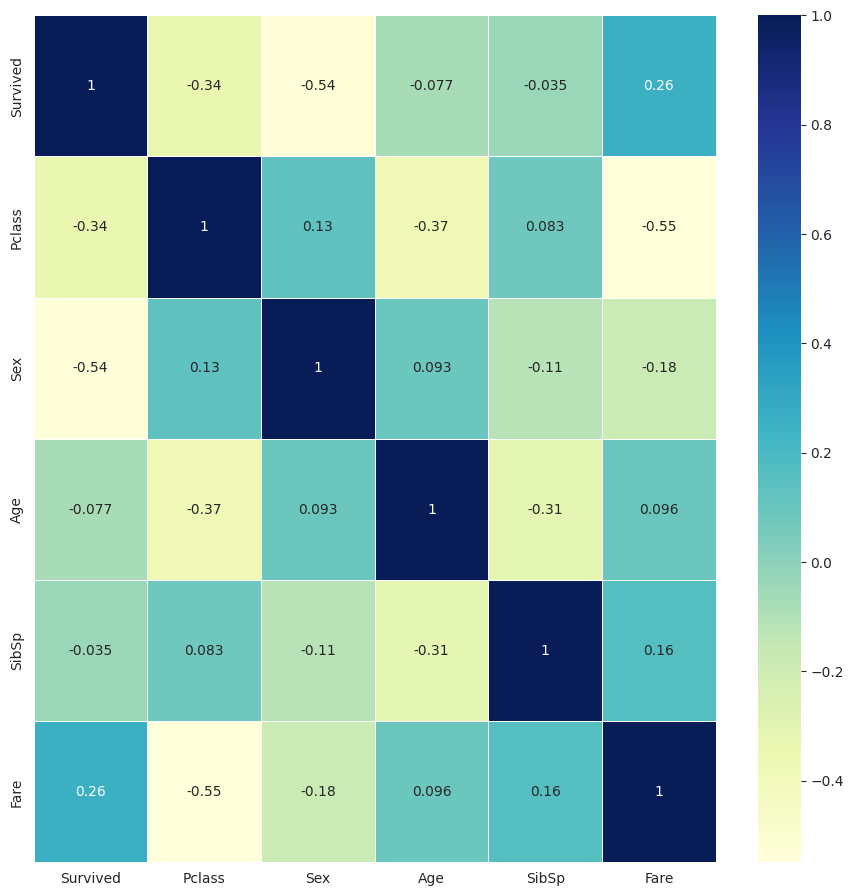

In [39]:
explore.correlation_plot(data=data,output_path='./output/')

## Heatmap

   year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121
      passengers                                                       
year        1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                  
Jan          112  115  145  171  196  204  242  284  315  340  360  417
Feb          118  126  150  180  196  188  233  277  301  318  342  391
Mar          132  141  178  193  236  235  267  317  356  362  406  419
Apr          129  135  163  181  235  227  269  313  348  348  396  461
May          121  125  172  183  229  234  270  318  355  363  420  472
Jun          135  149  178  218  243  264  315  374  422  435  472  535
Jul          148  170  199  230  264  302  364  413  465  491  548  622
Aug          148  170  199  242  272  293  347  405  467  505  559  606
Sep          136  158  184  209  237  259  312  355 

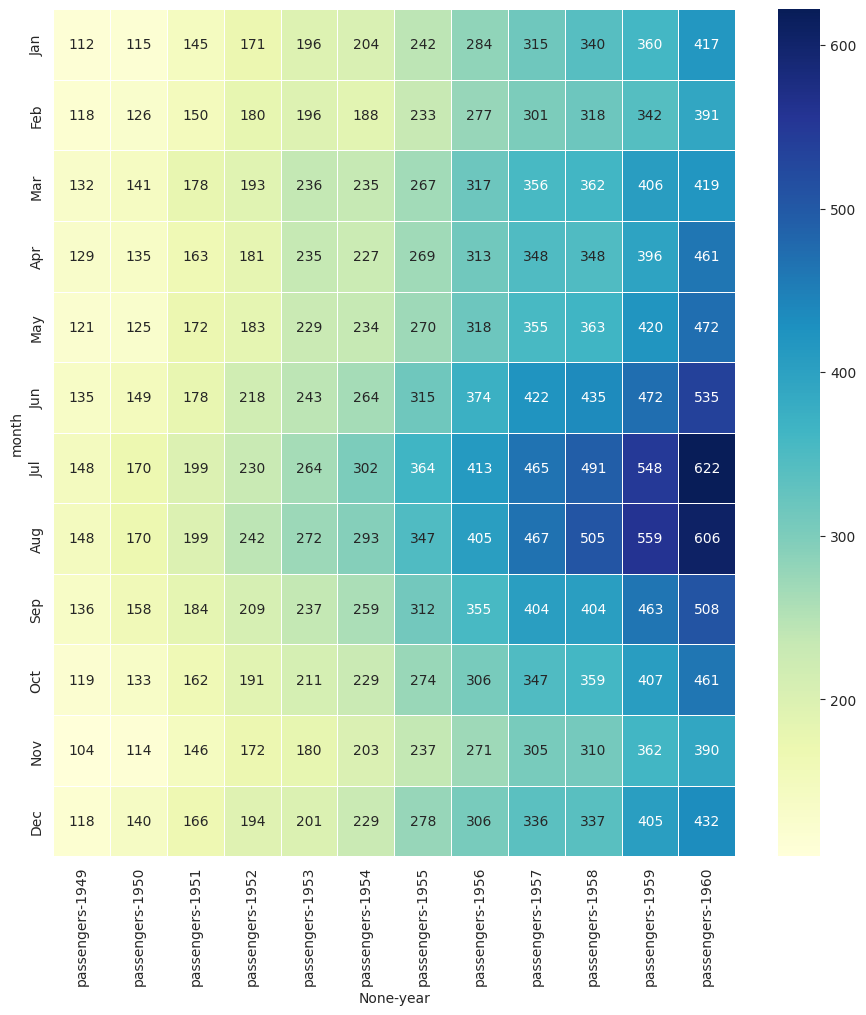

In [23]:
flights = sns.load_dataset("flights")
print(flights.head(5))
# explore.heatmap(data=data[['Sex','Survived']])
flights = flights.pivot(index='month', columns=["year"], values=["passengers"])
print(flights.head(12))
explore.heatmap(data=flights,output_path='./output/')